<a href="https://colab.research.google.com/github/qwertymasterkey/captcha_recognition/blob/main/Captcha_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
from pathlib import Path
data_dir = Path("/content/drive/MyDrive/captcha_segment/segmented_dataset_")
images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))

In [ ]:
!pip install split_folders
import splitfolders


In [ ]:
input_folder="/content/drive/MyDrive/captcha_segment/segmented_dataset_/captcha/data/"
output_folder="/content/drive/MyDrive/captcha_segment/splitted_dataset_/"


In [ ]:
splitfolders.ratio(input_folder,output_folder,seed=5,ratio=(.7,.15,.15))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_height,img_width=(128,128)
batch_size=32
train_data_dir="/content/drive/MyDrive/captcha_segment/splitted_dataset_/train"
val_data_dir="/content/drive/MyDrive/captcha_segment/splitted_dataset_/val"
test_data_dir="/content/drive/MyDrive/captcha_segment/splitted_dataset_/test"

In [ ]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 rotation_range=20,
                                 horizontal_flip=True,)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

Found 4072 images belonging to 62 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_generator=test_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 849 images belonging to 62 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height,img_width),
    batch_size=1,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 937 images belonging to 62 classes.


In [ ]:
x,y=test_generator.next()

In [ ]:
x.shape

(1, 128, 128, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras import layers


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,BatchNormalization
import os
import pickle

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(128,128,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(192,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(288,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(384,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5000,activation='relu'))
model.add(Dense(62,activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 192)       221376    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 192)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 288)       497952    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 288)     

In [ ]:
model.fit(train_generator,
          steps_per_epoch = 16,
          epochs = 25,
          validation_data = valid_generator,
          validation_steps = 16)

Epoch 1/25
16/16 [==============================] - 131s 8s/step - loss: 4.1601 - accuracy: 0.0547 - val_loss: 4.0605 - val_accuracy: 0.0898
Epoch 2/25
16/16 [==============================] - 127s 8s/step - loss: 3.9727 - accuracy: 0.0703 - val_loss: 3.8873 - val_accuracy: 0.0664
Epoch 3/25
16/16 [==============================] - 123s 8s/step - loss: 3.9152 - accuracy: 0.0742 - val_loss: 3.9328 - val_accuracy: 0.0625
Epoch 4/25
16/16 [==============================] - 124s 8s/step - loss: 3.7918 - accuracy: 0.0996 - val_loss: 3.6549 - val_accuracy: 0.0742
Epoch 5/25
16/16 [==============================] - 128s 8s/step - loss: 3.6774 - accuracy: 0.1250 - val_loss: 3.0228 - val_accuracy: 0.3086
Epoch 6/25
16/16 [==============================] - 118s 7s/step - loss: 2.8765 - accuracy: 0.3217 - val_loss: 2.3737 - val_accuracy: 0.3828
Epoch 7/25
16/16 [==============================] - 124s 8s/step - loss: 2.2152 - accuracy: 0.4199 - val_loss: 1.5623 - val_accuracy: 0.5332
Epoch 8/25
16

In [ ]:
test_loss,test_acc=model.evaluate(test_generator,verbose=1)

937/937 [==============================] - 380s 406ms/step - loss: 0.3608 - accuracy: 0.8975


In [ ]:
print("Testing Accuracy:",round(test_acc*100,2),"%")

Testing Accuracy: 89.75 %


In [ ]:
model=tf.keras.models.load_model(
    '/content/drive/MyDrive/captcha_segment/captcha_model.h5' )

In [ ]:
diction = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
           11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
           21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
           31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e',
           41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 
           51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
           61: 'z'}

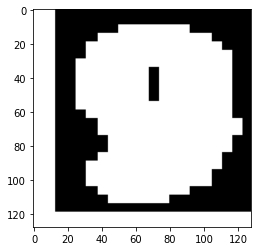

In [ ]:
filename = '/content/108769395.png'
test_image = image.load_img(filename,target_size=(128,128))
plt.imshow(test_image,cmap='gray')
test_image_arr=np.array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
count=0
result1 = model.predict(test_image)
for i in result1:
  for j in i:
    if j==1:
      res=count
    count+=1  
print('The predicted letter is:',diction[res])

The predicted letter is: 9


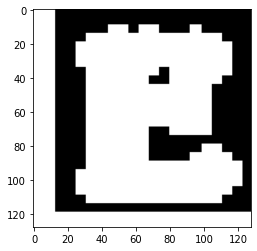

In [ ]:
filename = '/content/677612659.png'
test_image = image.load_img(filename,target_size=(128,128))
plt.imshow(test_image,cmap='gray')
test_image_arr=np.array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [ ]:
result = model.predict(test_image)
count=0
for i in result:
  for j in i:
    if j==1:
      res=count
    count+=1  
print('The predicted letter is:',diction[res])

The predicted letter is: E
